In [2]:
## import all libraries to use for the whole notebook

import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#loading in csv
fires = pd.read_csv("fire.csv", sep=",")
fires.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


Here we have the raw data table of fire incidents.

In [12]:
#getting a count of fires
Dict={}
for index, row in fires.iterrows():
    zipcode = row['neighborhood']
    if zipcode in Dict:
        Dict[zipcode]+=1
    else:
        Dict[zipcode]=1

### Getting the number of fires
Above we have the counts of how many fires per neighborhood.

In [7]:
#formatting the data
finalfreq=pd.DataFrame(Dict.items())
finalfreq.columns = ['Neighborhood', 'Fire Frequency']
finalfinal=finalfreq.loc[1:,:]
finalfinal['Fire Frequency'] = pd.to_numeric(finalfinal['Fire Frequency'], errors='coerce')
finalfinal = finalfinal.dropna(subset=['Fire Frequency'])
finalfinal

<ipython-input-7-b6b76fdc689a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalfinal['Fire Frequency'] = pd.to_numeric(finalfinal['Fire Frequency'], errors='coerce')


,Neighborhood,Fire Frequency
1,Fineview,46
2,Fairywood,23
3,South Side Flats,225
4,Allegheny Center,56
5,Lincoln-Lemington-Belmar,177
...,...,...
87,Arlington Heights,13
88,South Shore,22
89,Oakwood,13
90,Chartiers City,14


### Scoring 
Now we create a data frame of the useful information we want to use. Below we created a score section and added a score to each neighborhood based on the fire frequency and dividing it by a common number to better add it and fit to an overall score.

In [8]:
#adding a score
finalfinal['Score']=finalfinal['Fire Frequency']/30
print(finalfinal.to_string())

                 Neighborhood  Fire Frequency     Score
1                    Fineview              46  1.533333
2                   Fairywood              23  0.766667
3            South Side Flats             225  7.500000
4            Allegheny Center              56  1.866667
5    Lincoln-Lemington-Belmar             177  5.900000
6                     Carrick             263  8.766667
7                   Beechview             129  4.300000
8                   Allentown             115  3.833333
9                 Beltzhoover             117  3.900000
10            Crafton Heights              77  2.566667
11             Homewood North             171  5.700000
12        Squirrel Hill South             235  7.833333
13                Perry North             102  3.400000
14          Bedford Dwellings              38  1.266667
15             Homewood South             175  5.833333
16             East Allegheny             113  3.766667
17           Crawford-Roberts              92  3

Text(0, 0.5, 'Fire Frequency')

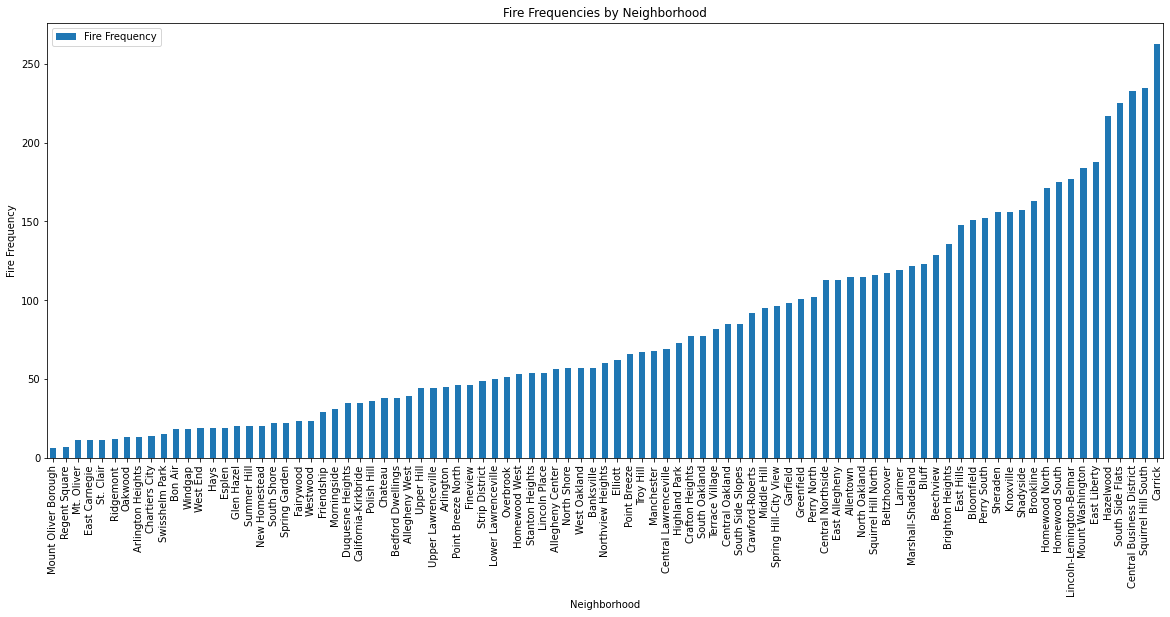

In [9]:
#creating bar chart
finalfinal.sort_values(by=['Fire Frequency'], inplace=True, ascending=True)
plt.rcParams['figure.figsize']=[20,8]
finalfinal.plot.bar(x="Neighborhood",y="Fire Frequency")
plt.title("Fire Frequencies by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Fire Frequency")

### Creating the Map
We want to visualize how many fires by creating a heatmap. We may want to s

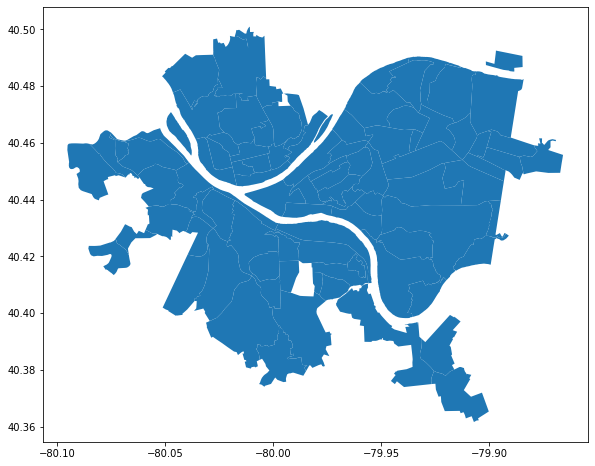

In [16]:
#reading shp file
neighborhoods=geopandas.read_file("neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

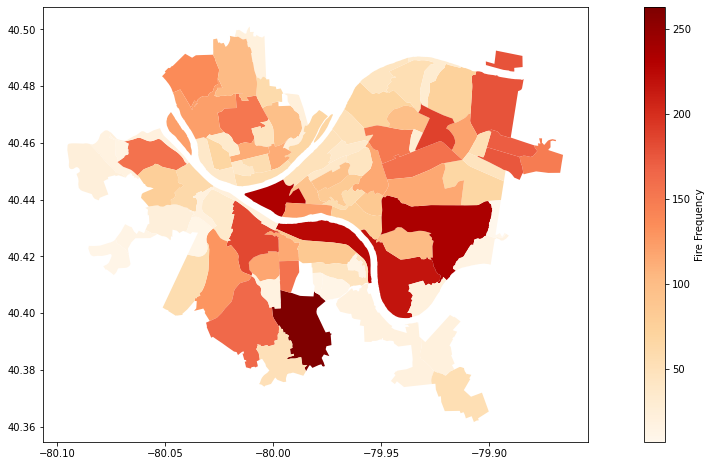

In [17]:
#creating map
finalfinal=finalfinal.loc[:,["Neighborhood","Fire Frequency"]]
firefrequencymap=neighborhoods.merge(finalfinal, how="left", left_on="hood",right_on="Neighborhood")
firefrequencymap.plot(column='Fire Frequency',
            cmap='OrRd',
            legend=True,
            legend_kwds={'label':"Fire Frequency"},
            )

### Conclusion
Based on the scoring Mount Oliver Borough has the least amount of fires reported, but it is also interesting to note that Squirrel Hill South has the one of the most. Areas where they may be more people have a significant more amount of fires.